物体识别和目标检测数据集通常比图片分类数据集小很多，因为标注成本很高。

通过四个数字即可表示边缘框，如：左上右下表示、左上高宽表示，中间宽高表示

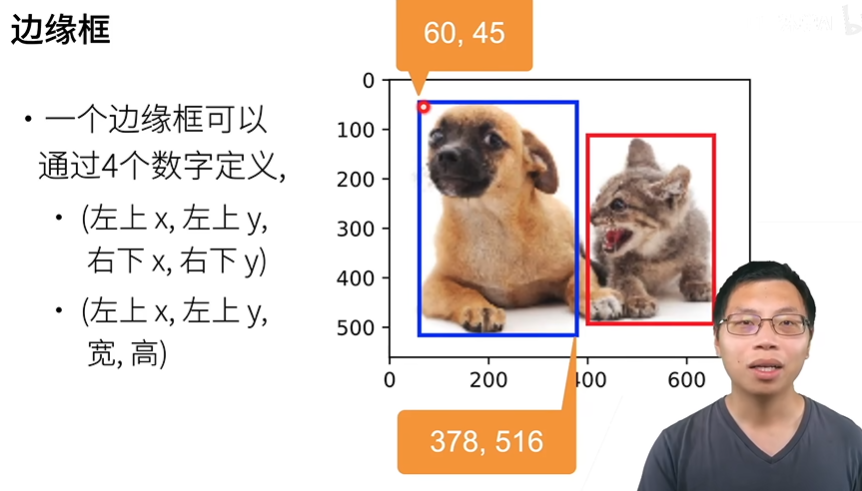

目标检测数据集label的存储形式，由于一个图片中很可能有多个物体，所以一个图片文件名可能出现多次。目标检测常见的数据集：COCO
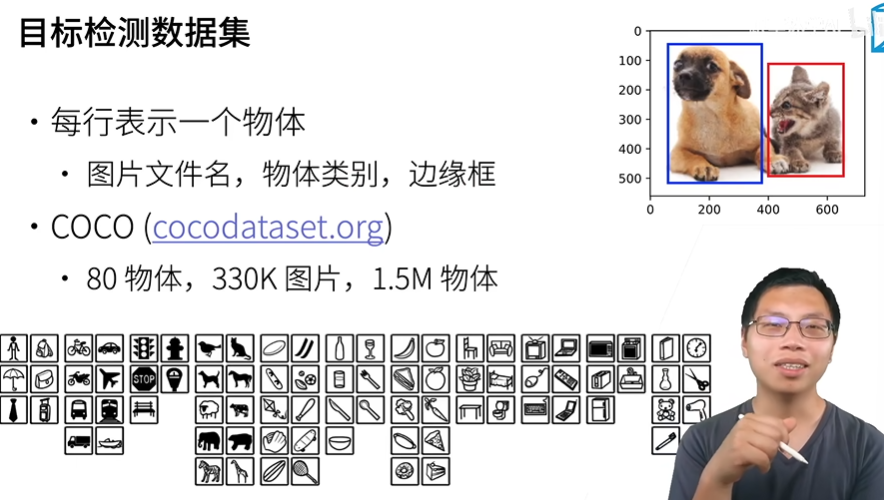

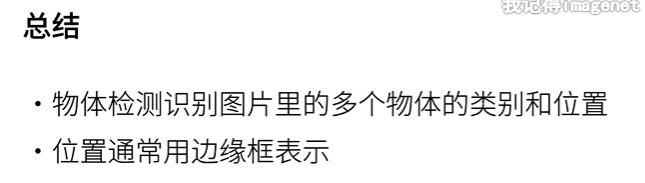

## 边缘框实现 bounding box

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

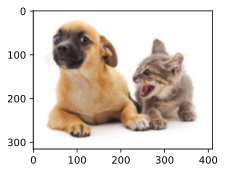

In [2]:
d2l.set_figsize()
img = d2l.plt.imread('../img/catdog.jpg')
d2l.plt.imshow(img)

边缘框表示方式之间的转换函数的实现

In [4]:
# boxes可以视为四列的矩阵，行数取决于有多少个边缘框
def box_corner_to_center(boxes):
    """从（左上，右下）转换为（中间，宽，高）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    # 中心坐标
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

我们将dog和cat的边缘框表示出来

In [21]:
dog_bbox, cat_bbox = [30.0, 20.0, 220.0, 295.0], [228.0, 65.0, 380.0, 280.0]

验证bbox表示方式转换函数的正确性

In [22]:
boxes = torch.tensor((dog_bbox, cat_bbox))
boxes # 两个边缘框

tensor([[ 30.,  20., 220., 295.],
        [228.,  65., 380., 280.]])

In [7]:
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

## 使用matplotlib画出边缘框

In [8]:
def bbox_to_rect(bbox, color):
     # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：((左上x,左上y),宽,高)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

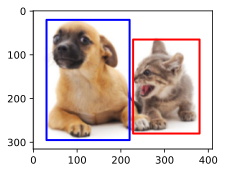

In [23]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))